<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Setup" data-toc-modified-id="Setup-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Setup</a></span><ul class="toc-item"><li><span><a href="#QC-Thresholds" data-toc-modified-id="QC-Thresholds-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>QC Thresholds</a></span></li><li><span><a href="#Inputs" data-toc-modified-id="Inputs-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Inputs</a></span></li><li><span><a href="#Load-expression-data" data-toc-modified-id="Load-expression-data-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Load expression data</a></span></li><li><span><a href="#Load-QC-data" data-toc-modified-id="Load-QC-data-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Load QC data</a></span></li><li><span><a href="#Load-metadata" data-toc-modified-id="Load-metadata-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Load metadata</a></span></li><li><span><a href="#Remove-extra-sample-rows" data-toc-modified-id="Remove-extra-sample-rows-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>Remove extra sample rows</a></span></li></ul></li><li><span><a href="#Check-statistics" data-toc-modified-id="Check-statistics-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Check statistics</a></span><ul class="toc-item"><li><span><a href="#FastQC-stats" data-toc-modified-id="FastQC-stats-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>FastQC stats</a></span></li><li><span><a href="#Number-of-aligned-reads" data-toc-modified-id="Number-of-aligned-reads-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Number of aligned reads</a></span></li></ul></li><li><span><a href="#Examine-Global-Correlations" data-toc-modified-id="Examine-Global-Correlations-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Examine Global Correlations</a></span><ul class="toc-item"><li><span><a href="#Hierarchical-Clustering" data-toc-modified-id="Hierarchical-Clustering-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Hierarchical Clustering</a></span></li></ul></li><li><span><a href="#Remove-failed-samples" data-toc-modified-id="Remove-failed-samples-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Remove failed samples</a></span></li><li><span><a href="#Metadata-Curation" data-toc-modified-id="Metadata-Curation-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Metadata Curation</a></span><ul class="toc-item"><li><span><a href="#BioProject-counts-of-passing-metadata" data-toc-modified-id="BioProject-counts-of-passing-metadata-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>BioProject counts of passing metadata</a></span></li><li><span><a href="#BioProject-counts-of-all-metadata" data-toc-modified-id="BioProject-counts-of-all-metadata-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>BioProject counts of all metadata</a></span></li></ul></li><li><span><a href="#Correlations-between-replicates" data-toc-modified-id="Correlations-between-replicates-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Correlations between replicates</a></span><ul class="toc-item"><li><span><a href="#Compute-Pearson-R-Score" data-toc-modified-id="Compute-Pearson-R-Score-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Compute Pearson R Score</a></span></li><li><span><a href="#Drop-Samples-with-no-replicates" data-toc-modified-id="Drop-Samples-with-no-replicates-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Drop Samples with no replicates</a></span></li></ul></li><li><span><a href="#Remove-failed-samples" data-toc-modified-id="Remove-failed-samples-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Remove failed samples</a></span></li><li><span><a href="#Save-final-datasets" data-toc-modified-id="Save-final-datasets-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Save final datasets</a></span></li></ul></div>

<font size="4">This is a template notebook for performing preliminary quality control on your organism's expression data.</font>

In [1]:
import pandas as pd
import os
from os import path
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
sns.set_style('ticks')

# Setup

## QC Thresholds

In [3]:
min_mrna_reads = 5e5 # Minimum number of reads mapped to mRNA

## Inputs

<font size="4">Show files in the data directory</font>

In [4]:
data_dir = path.join('..','data','raw_data')
os.listdir(data_dir)

['Mycobacterium_tuberculosis_H37Rv_2020-08-20.tsv',
 'counts.csv',
 'multiqc_report.html',
 'log_tpm.csv',
 'multiqc_stats.tsv']

<font size="4">Enter name of curated metadata file here</font>

In [5]:
metadata_file = "Mycobacterium_tuberculosis_H37Rv_2020-08-20.tsv" # Enter metadata filename here

## Load expression data

In [6]:
DF_log_tpm = pd.read_csv(path.join(data_dir,'log_tpm.csv'),index_col=0).fillna(0)
print('Number of genes:',DF_log_tpm.shape[0])
print('Number of samples:',DF_log_tpm.shape[1])

Number of genes: 3906
Number of samples: 973


In [7]:
DF_log_tpm.head()

,ERX1101427,ERX1101428,ERX1101429,ERX1101430,ERX1404043,ERX1404044,ERX1404045,ERX1404046,ERX1776916,ERX1776917,...,SRX976574,SRX976711,SRX976712,SRX976715,SRX976718,SRX976787,SRX976789,SRX976790,SRX976791,SRX976793
Geneid,,,,,,,,,,,,,,,,,,,,,
Rv0001,10.159949,8.395236,8.978326,9.141643,9.253756,9.418933,9.517331,9.320975,0.0,0,...,7.214101,7.453869,8.321558,7.422248,8.095670,7.948565,8.027306,7.802712,8.440249,8.001918
Rv0002,6.949827,6.442191,5.218795,7.411978,8.075239,8.366226,8.129448,8.178214,0.0,0,...,8.164924,7.671283,8.181160,8.052864,7.720797,7.606113,7.812051,8.239403,7.305357,7.426203
Rv0003,6.993428,6.069505,5.781795,7.511433,7.568466,7.676990,7.610276,7.768221,0.0,0,...,6.721234,6.479591,6.761395,7.439861,7.233200,7.086560,7.390990,7.578543,7.718887,7.103476
Rv0004,6.663468,5.849967,5.619619,7.256654,6.517523,6.519247,6.659192,6.658270,0.0,0,...,6.538574,6.199045,6.220420,6.167678,7.363346,4.843010,6.119214,7.501351,6.563591,5.778822
Rv0005,10.038821,8.847967,9.778439,9.725231,8.504757,8.436449,8.303699,8.252984,0.0,0,...,9.617118,9.524767,9.509278,9.432550,9.441081,9.547398,9.378309,9.811912,9.629788,9.646582


## Load QC data
<font size="4">There may be some datasets that failed along the processing pipeline, so the number of samples with QC data may be higher than the number of samples with expression data.</font>

In [8]:
DF_qc_stats = pd.read_csv(path.join(data_dir,'multiqc_stats.tsv'),index_col=0,sep="\t")
print('Number of samples with QC data:',DF_qc_stats.shape[0])

Number of samples with QC data: 973


In [9]:
DF_qc_stats.fillna(0,inplace=True)
DF_qc_stats.head()

,Total,Assigned,Unassigned_rRNA,Unassigned_Unmapped,Unassigned_Read_Type,Unassigned_Singleton,Unassigned_MappingQuality,Unassigned_Chimera,Unassigned_FragmentLength,Unassigned_Duplicate,...,r_written,bp_processed,quality_trimmed,bp_written,percent_trimmed,se_sense,se_antisense,failed,pe_sense,pe_antisense
ERX1101427,152167989,87125072,8217444,17376724,0,0,0,0,0,0,...,152206984,15220698400,261716139,14863436222,2.347213,0.4517,0.0851,0.4633,0.0,0.0
ERX1101428,18752116,7393819,3095173,2418117,0,0,0,0,0,0,...,18759446,1500755680,14145520,1478619813,1.474981,0.4610,0.1047,0.4343,0.0,0.0
ERX1101429,159832564,40288283,54172991,10579089,0,0,0,0,0,0,...,159867491,15986749100,197654796,15561690915,2.658816,0.5557,0.0721,0.3722,0.0,0.0
ERX1101430,19312369,10863906,1405072,493573,0,0,0,0,0,0,...,19318490,1545479200,15646047,1523131701,1.445992,0.4339,0.1181,0.4479,0.0,0.0
ERX1404043,6439971,1731605,613120,2420951,0,0,0,0,0,0,...,6447428,618953088,67850082,547701328,11.511658,0.6312,0.0734,0.2954,0.0,0.0


## Load metadata

In [10]:
DF_metadata = pd.read_csv(path.join(data_dir,metadata_file),index_col=0,sep="\t")
print('Number of samples with metadata:',DF_metadata.shape[0])
DF_metadata.head()

Number of samples with metadata: 985


,ReleaseDate,TaxID,ScientificName,species_tax_id,class_tax_id,strain_tax_id,species,LibraryLayout,Platform,Model,...,GEO Series,GEO Sample,PMID,biosample_strain,biosample_genotype,R1,R2,project,condition,reference_condition
Experiment,,,,,,,,,,,,,,,,,,,,,
ERX1101427,2017-09-22 07:55:23,83332,Mycobacterium tuberculosis H37Rv,1773,1760,83332,Mycobacterium tuberculosis,SINGLE,ILLUMINA,Illumina HiSeq 2500,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,sputum,expn_growth,expn_growth
ERX1101428,2017-09-22 07:55:23,83332,Mycobacterium tuberculosis H37Rv,1773,1760,83332,Mycobacterium tuberculosis,SINGLE,ILLUMINA,Illumina HiSeq 2500,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,sputum,stat_growth,expn_growth
ERX1101429,2017-09-22 07:55:23,83332,Mycobacterium tuberculosis H37Rv,1773,1760,83332,Mycobacterium tuberculosis,SINGLE,ILLUMINA,Illumina HiSeq 2500,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,sputum,stat_growth,expn_growth
ERX1101430,2017-09-22 07:55:23,83332,Mycobacterium tuberculosis H37Rv,1773,1760,83332,Mycobacterium tuberculosis,SINGLE,ILLUMINA,Illumina HiSeq 2500,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,sputum,expn_growth,expn_growth
ERX1404043,2016-12-02 11:01:27,83332,Mycobacterium tuberculosis H37Rv,1773,1760,83332,Mycobacterium tuberculosis,SINGLE,ILLUMINA,Illumina HiSeq 2000,...,NaN,NaN,27724857.0,NaN,NaN,NaN,NaN,genotoxic,growth_supplement,control


## Remove extra sample rows

In [11]:
# Ensure that metadata and qc_stats data contain all log_tpm sample information
assert(set(DF_log_tpm.columns) - set(DF_metadata.index) == set())
assert(set(DF_log_tpm.columns) - set(DF_qc_stats.index) == set())

In [12]:
DF_metadata = DF_metadata.loc[DF_log_tpm.columns]
DF_qc_stats = DF_qc_stats.loc[DF_log_tpm.columns]

# Check statistics

<font size="4">From here, create a new spreadsheet where you can flag samples based on various QC statistics</font>


## FastQC stats

In [13]:
fastqc_cols = ['per_base_sequence_quality',
       #'per_tile_sequence_quality', 
        'per_sequence_quality_scores',
       'per_base_sequence_content', 'per_sequence_gc_content',
       'per_base_n_content', 'sequence_length_distribution',
       'sequence_duplication_levels', 'overrepresented_sequences',
       'adapter_content']

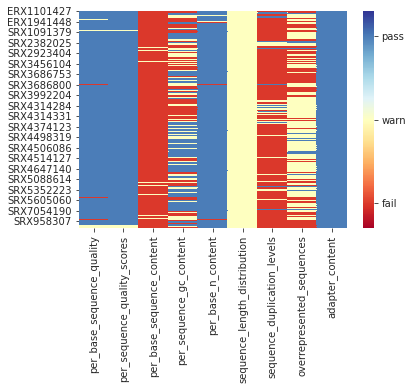

In [14]:
DF_fastqc = DF_qc_stats[fastqc_cols]
ax = sns.heatmap(DF_fastqc.replace('pass',1).replace('warn',0).replace('fail',-1),
            cmap='RdYlBu',vmax=1.3,vmin=-1.3)
cbar = ax.collections[0].colorbar
cbar.set_ticks([-1,0,1])
cbar.set_ticklabels(['fail','warn','pass'])

<font size="4">The following four categories are the most important:
    - per_base_sequence_quality
    - per_sequence_quality_scores
    - per_base_n_content
    - adapter_content
    
If a sample does not pass any of these four categories, discard the sample
</font>

In [15]:
fastqc_fail_cols = ['per_base_sequence_quality','per_sequence_quality_scores','per_base_n_content','adapter_content']

In [16]:
DF_failed_fastqc = DF_fastqc[fastqc_fail_cols][(DF_fastqc[fastqc_fail_cols] != 'pass').any(axis=1)]
DF_failed_fastqc[fastqc_fail_cols]

,per_base_sequence_quality,per_sequence_quality_scores,per_base_n_content,adapter_content
ERX1776918,pass,warn,pass,pass
ERX1776919,pass,warn,pass,pass
ERX1776920,pass,warn,pass,pass
ERX1818309,pass,pass,warn,pass
ERX1941440,warn,pass,pass,pass
ERX1941441,warn,pass,pass,pass
ERX1941443,warn,pass,pass,pass
ERX1941444,warn,pass,pass,pass
ERX1941447,warn,pass,pass,pass
ERX1941448,warn,pass,pass,pass


<font size="4">Mark samples as failed.</font>

In [17]:
DF_metadata['passed_fastqc'] = ~DF_metadata.index.isin(DF_failed_fastqc.index)

## Number of aligned reads

<font size="4">The following histogram shows how many reads map to coding sequences (i.e. mRNA). Too few aligned reads reduces the sensitivity of the resulting data.</font>

In [18]:
min_mrna_reads

500000.0

Text(0.5, 1.0, 'Number of reads mapped to CDS')

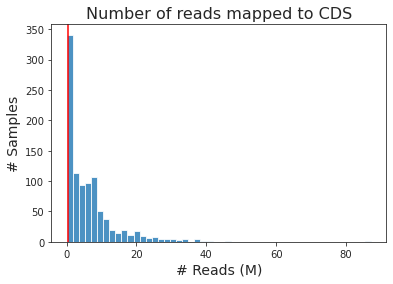

In [19]:
fig,ax = plt.subplots()
ax.hist(DF_qc_stats['Assigned']/1e6,bins=50,alpha=0.8)
ymin,ymax = ax.get_ylim()
ax.vlines(min_mrna_reads/1e6,ymin,ymax,color='r')
ax.set_ylim((ymin,ymax))
ax.set_xlabel('# Reads (M)',fontsize=14)
ax.set_ylabel('# Samples',fontsize=14)
ax.set_title('Number of reads mapped to CDS',fontsize=16)

<font size="4">Identify samples with poor read depth:</font>

In [20]:
DF_failed_mrna = DF_qc_stats[DF_qc_stats['Assigned'] < min_mrna_reads].sort_values('Assigned')
DF_failed_mrna

,Total,Assigned,Unassigned_rRNA,Unassigned_Unmapped,Unassigned_Read_Type,Unassigned_Singleton,Unassigned_MappingQuality,Unassigned_Chimera,Unassigned_FragmentLength,Unassigned_Duplicate,...,r_written,bp_processed,quality_trimmed,bp_written,percent_trimmed,se_sense,se_antisense,failed,pe_sense,pe_antisense
ERX3390648,10945041,0,0,10945033,0,0,0,0,8,0,...,11827824,650530320,3077791,574039113,11.758285,0.0000,0.0000,0.3750,0.5000,0.1250
ERX1776917,15178,0,0,15178,0,0,0,0,0,0,...,8783954,474333516,201084179,269819606,43.116057,0.0000,0.0000,0.0000,0.0000,0.0000
ERX3390649,4294295,1,0,4294269,0,0,0,0,24,0,...,6959238,341002662,551198,262178051,23.115541,0.0000,0.0000,0.3462,0.5769,0.0769
ERX1776916,568196,117,89887,409334,0,0,0,0,49462,0,...,13138261,709466094,629280476,70697000,90.035183,0.0000,0.0000,0.0003,0.8470,0.1527
ERX1776922,11357351,940,333327,10981603,0,0,0,0,4949,0,...,11909307,643102578,24328023,614709232,4.415057,0.0000,0.0000,0.0021,0.0741,0.9238
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ERX237498,11042129,482184,9344551,606171,0,0,0,0,0,0,...,11047452,552372600,6821802,540178483,2.207589,0.9507,0.0092,0.0401,0.0000,0.0000
SRX4670984,70728440,483249,609844,68930201,0,0,0,0,0,0,...,76198145,5755136955,67532402,3106807289,46.016797,0.4975,0.1965,0.3060,0.0000,0.0000
SRX380298,2061862,488560,852235,464421,0,0,0,0,20072,0,...,2364009,120564459,14277971,105129158,12.802530,0.0000,0.0000,0.1969,0.0646,0.7385
SRX186566,176014623,491865,154416376,18450647,0,0,0,0,0,0,...,176077447,8979949797,61827214,8842561906,1.529941,0.9934,0.0009,0.0056,0.0000,0.0000


<font size="4">Mark samples as failed.</font>

In [21]:
DF_metadata['passed_reads_mapped_to_CDS'] = ~DF_metadata.index.isin(DF_failed_mrna.index)

# Examine Global Correlations

## Hierarchical Clustering

<font size=4> A clustermap is a great way to visualize the global correlations between one sample and all others. The following code uses hierarchical clustering to identify specific clusters in the clustermap <font size=4>
    
<font size=4> To increase the number of clusters, decrease the value of `thresh`. To decrease the number of clusters, increase the value of `thresh` <font size=4>

In [22]:
import scipy.cluster.hierarchy as sch
import matplotlib.patches as patches
# change this to get different number of clusters
thresh = .3

# retrieve clusters using fcluster 
corr = DF_log_tpm.corr()
corr.fillna(0,inplace=True)
dist = sch.distance.pdist(corr)
link = sch.linkage(dist, method='complete')
clst = pd.DataFrame(index=DF_log_tpm.columns)
clst['cluster'] = sch.fcluster(link, thresh * dist.max(), 'distance')

#get colors for each cluster
cm = plt.cm.get_cmap('tab20')
clr = dict(zip(clst.cluster.unique(), cm.colors))
clst['color'] = clst.cluster.map(clr)

print('Number of cluster: ', len(clr))

Number of cluster:  6


<font size="4">To view sample IDs in the clustermap, set `xticklabels` and `yticklabels` to `True`. You can increase the `size` variable to improve readability of sample IDs<font>

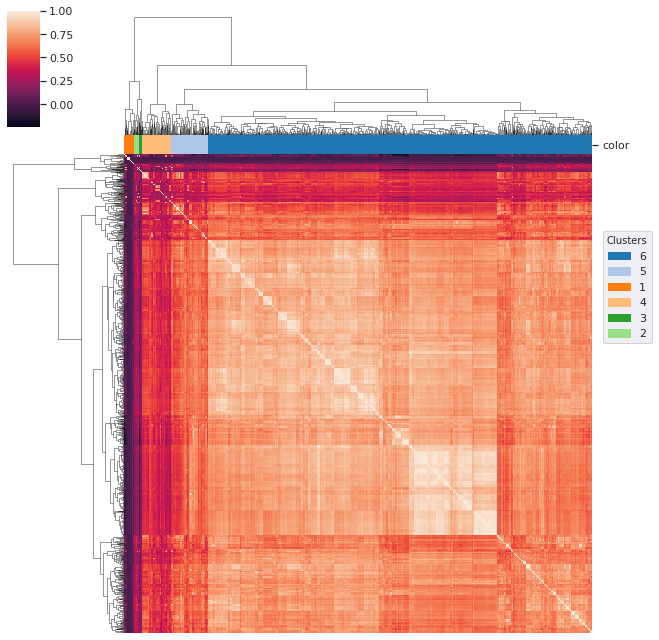

In [23]:
size = 9

legend_TN = [patches.Patch(color=c, label=l) for l,c in clr.items()]

sns.set(rc={'figure.facecolor':'white'})
g = sns.clustermap(DF_log_tpm.corr(), figsize=(size,size), 
                   row_linkage=link, col_linkage=link, col_colors=clst.color,
                  yticklabels=False, xticklabels=False)

l2=g.ax_heatmap.legend(loc='upper left', bbox_to_anchor=(1.01,0.85), handles=legend_TN,frameon=True)
l2.set_title(title='Clusters',prop={'size':10})

<font size="4">Select clusters to remove.</font>

In [24]:
#indicate which clusters you want to remove
remove_clst = [1,2,3]
failed_global_corr = clst[clst.cluster.isin(remove_clst)].index

In [25]:
DF_metadata['passed_global_correlation'] = ~DF_metadata.index.isin(failed_global_corr)

In [26]:
DF_metadata.head()

,ReleaseDate,TaxID,ScientificName,species_tax_id,class_tax_id,strain_tax_id,species,LibraryLayout,Platform,Model,...,biosample_strain,biosample_genotype,R1,R2,project,condition,reference_condition,passed_fastqc,passed_reads_mapped_to_CDS,passed_global_correlation
ERX1101427,2017-09-22 07:55:23,83332,Mycobacterium tuberculosis H37Rv,1773,1760,83332,Mycobacterium tuberculosis,SINGLE,ILLUMINA,Illumina HiSeq 2500,...,NaN,NaN,NaN,NaN,sputum,expn_growth,expn_growth,True,True,True
ERX1101428,2017-09-22 07:55:23,83332,Mycobacterium tuberculosis H37Rv,1773,1760,83332,Mycobacterium tuberculosis,SINGLE,ILLUMINA,Illumina HiSeq 2500,...,NaN,NaN,NaN,NaN,sputum,stat_growth,expn_growth,True,True,True
ERX1101429,2017-09-22 07:55:23,83332,Mycobacterium tuberculosis H37Rv,1773,1760,83332,Mycobacterium tuberculosis,SINGLE,ILLUMINA,Illumina HiSeq 2500,...,NaN,NaN,NaN,NaN,sputum,stat_growth,expn_growth,True,True,True
ERX1101430,2017-09-22 07:55:23,83332,Mycobacterium tuberculosis H37Rv,1773,1760,83332,Mycobacterium tuberculosis,SINGLE,ILLUMINA,Illumina HiSeq 2500,...,NaN,NaN,NaN,NaN,sputum,expn_growth,expn_growth,True,True,True
ERX1404043,2016-12-02 11:01:27,83332,Mycobacterium tuberculosis H37Rv,1773,1760,83332,Mycobacterium tuberculosis,SINGLE,ILLUMINA,Illumina HiSeq 2000,...,NaN,NaN,NaN,NaN,genotoxic,growth_supplement,control,True,True,True


# Remove failed samples

In [27]:
qc_columns = ['passed_fastqc',
              'passed_reads_mapped_to_CDS',
              'passed_global_correlation']

In [28]:
pass_qc = DF_metadata[qc_columns].all(axis=1)
DF_metadata_passed = DF_metadata[pass_qc]

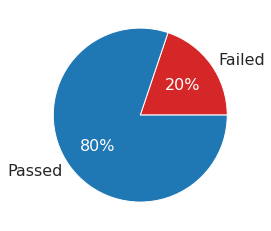

In [29]:
_,_,pcts = plt.pie(pass_qc.value_counts().sort_values(),
        labels = ['Failed','Passed'],
        colors=['tab:red','tab:blue'],
        autopct='%.0f%%',textprops={'size':16});

# Colors percents white
for pct in pcts:
    pct.set_color('white')

# Metadata Curation

<font size=4>The following sections can only be run after metadata curation is complete. To enable metadata curation, the code in this section sorts data by BioProject. </font>

## BioProject counts of passing metadata

In [30]:
DF_metadata_passed.BioProject.value_counts().sort_values(ascending=False)

PRJNA433880    85
PRJNA478238    69
PRJNA508198    29
PRJNA354066    24
PRJNA453381    24
               ..
PRJNA251986     1
PRJNA427080     1
PRJNA414397     1
PRJNA478476     1
PRJNA490371     1
Name: BioProject, Length: 77, dtype: int64

## BioProject counts of all metadata

In [31]:
DF_metadata.BioProject.value_counts().sort_values(ascending=False)

PRJNA433880    88
PRJNA478238    81
PRJNA421561    36
PRJNA508198    29
PRJNA354066    28
               ..
PRJEB1952       2
PRJNA478476     1
PRJNA251986     1
PRJNA414397     1
PRJNA427080     1
Name: BioProject, Length: 86, dtype: int64

# Correlations between replicates

<font size=4> First, get a full sample name </font>

In [32]:
# Turn off pesky warning
pd.set_option('mode.chained_assignment', None)

In [33]:
DF_metadata_passed['full_name'] = DF_metadata_passed.loc[:,'project'].str.cat(DF_metadata_passed.loc[:,'condition'],sep=':')

## Compute Pearson R Score

<font size="4">Once you have updated your metadata files with the sample information, we can investigate correlations between biological replicates. We require biological replicates to have a Pearson R correlation above 0.95. For samples with more than 2 replicates, the replicates must have R >= 0.95 with at least one other replicate or it will be dropped. </font>

In [34]:
from tqdm.notebook import tqdm
import itertools
from scipy import stats
import numpy as np

In [35]:
rep_corrs = {}
rand_corrs = {}

num_comparisons = len(DF_metadata_passed)*(len(DF_metadata_passed)-1)/2
for exp1,exp2 in tqdm(itertools.combinations(DF_metadata_passed.index,2),total=num_comparisons):
    if DF_metadata_passed.loc[exp1,'full_name'] == DF_metadata_passed.loc[exp2,'full_name']:
        rep_corrs[(exp1,exp2)] = stats.pearsonr(DF_log_tpm[exp1],DF_log_tpm[exp2])[0]
    else:
        rand_corrs[(exp1,exp2)] = stats.pearsonr(DF_log_tpm[exp1],DF_log_tpm[exp2])[0]

In [36]:
sns.set_style('ticks')

Median Pearson R between replicates: 0.97


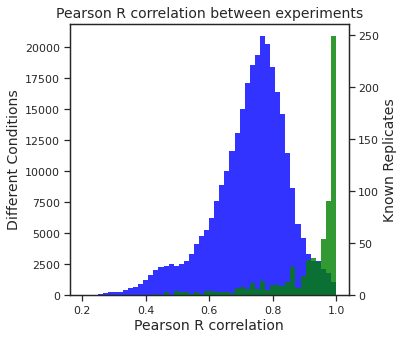

In [37]:
fig,ax = plt.subplots(figsize=(5,5))
ax2 = ax.twinx()
ax2.hist(rep_corrs.values(),bins=50,range=(0.2,1),alpha=0.8,color='green',linewidth=0)
ax.hist(rand_corrs.values(),bins=50,range=(0.2,1),alpha=0.8,color='blue',linewidth=0)
ax.set_title('Pearson R correlation between experiments',fontsize=14)
ax.set_xlabel('Pearson R correlation',fontsize=14)
ax.set_ylabel('Different Conditions',fontsize=14)
ax2.set_ylabel('Known Replicates',fontsize=14)

med_corr = np.median([v for k,v in rep_corrs.items()])
print('Median Pearson R between replicates: {:.2f}'.format(med_corr))

In [38]:
#pearson r cutoff for replicates
rcutoff = 0.85

#for each sample get max correlation between replicates
dissimilar = []
for idx, grp in DF_metadata_passed.groupby('full_name'):
    ident = np.identity(len(grp))
    corrs = (DF_log_tpm[grp.index].corr() - ident).max()
    dissimilar.extend(corrs[corrs<rcutoff].index)
DF_metadata['passed_replicate_corr'] = ~DF_metadata.index.isin(dissimilar)
DF_metadata_passed['passed_similar_replicates'] = ~DF_metadata_passed.index.isin(dissimilar)

## Drop Samples with no replicates

In [39]:
cond_counts = DF_metadata_passed.condition.value_counts()
drop_conds = cond_counts[cond_counts < 2].index
drop_conds

Index(['Sample1-A_R1', 'wt_comp_14', '1A_strain', '3.34mm_hist_del',
       '39_days_treated', 'Solexa-63230', '1A_strain_comp_14',
       '3.34mm_hist_wt', 'dextrose_hypo', 'day_4_run_1', 'Sample2-E_R1_1',
       'tss_starved', 'mutant_DMSO', '5um_btp15', 'wt_4.5', '48h_THP_A',
       '00h_WT', '000h_.81_DO', '24h_treated', 'ctrl_A', '27_days_treated',
       '04h_T5', '24h_THP_C', '5um_bbh7', 'dextrose_NRP1', 'QZ_30_MIC',
       'wt_t6p', '2_days_starve', '0_days_31', 'adipocytes', 'wt_no_ATC',
       '00h_THP_A', '.1_butyrate', '8A_strain', '00h_DUC_1', 'XX_h_NO',
       '5mm_lys_wt', 'Sample1-E_R1_1', 'wt_2h', 'Mtb_mc2_6206', 'dorm_run_2',
       'dextrose_NRP2', 'Solexa-63234', '20h_T5', '5mm_lys_del', '06_DUC',
       '03_days_treated', 'planktonic', '15_days_treated', 'wt_with_ATC',
       'mutant_drug_complement', '08h_expression', '1_days_30', '09h_DUC_ATC',
       'Solexa-63233', 'FA_NRP1', 'Solexa-63232', '24h_THP_A', '04h_THP_A',
       'ctrl_B', 'rpoB_starv', '8A_strain_co

In [40]:
DF_metadata_passed['passed_number_replicates'] = ~DF_metadata_passed.condition.isin(drop_conds)

In [41]:
DF_metadata_passed = DF_metadata_passed[DF_metadata_passed['passed_number_replicates']]

# Remove failed samples

In [42]:
qc_columns = ['passed_number_replicates','passed_similar_replicates']

In [43]:
DF_metadata_final = DF_metadata_passed[DF_metadata_passed[qc_columns].all(axis=1)]

In [44]:
DF_metadata_final.shape

(578, 42)

In [45]:
DF_log_tpm_final = DF_log_tpm[DF_metadata_final.index]

In [46]:
DF_log_tpm_final

,ERX1101427,ERX1101430,ERX1404043,ERX1404044,ERX1404045,ERX1404046,ERX1818322,ERX1818323,ERX2351092,ERX2351093,...,SRX958313,SRX958314,SRX958315,SRX958316,SRX958317,SRX958318,SRX958319,SRX958320,SRX958321,SRX958322
Geneid,,,,,,,,,,,,,,,,,,,,,
Rv0001,10.159949,9.141643,9.253756,9.418933,9.517331,9.320975,9.446970,9.395402,8.494335,8.825079,...,9.226002,8.842812,9.376690,9.376116,8.930311,9.879062,9.971684,9.318355,9.096029,8.918430
Rv0002,6.949827,7.411978,8.075239,8.366226,8.129448,8.178214,8.676468,8.837380,6.600072,6.962193,...,7.602410,7.549757,7.884631,7.786205,8.014941,7.128519,7.214206,6.801444,6.609463,6.638970
Rv0003,6.993428,7.511433,7.568466,7.676990,7.610276,7.768221,7.533695,7.693275,7.173953,6.884158,...,5.643212,5.563920,6.183325,6.263370,6.329129,5.382467,5.269903,4.901826,4.455494,4.525840
Rv0004,6.663468,7.256654,6.517523,6.519247,6.659192,6.658270,6.467453,6.854038,6.837212,6.804739,...,7.175846,7.042312,7.407021,7.320980,7.630003,6.684823,6.611582,6.890113,6.232645,6.447593
Rv0005,10.038821,9.725231,8.504757,8.436449,8.303699,8.252984,9.777337,9.808207,9.530271,9.582366,...,9.619059,9.650650,9.595700,9.681474,9.604369,9.925846,9.924517,10.302133,9.742140,9.592036
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Rv3920c,8.761571,9.078145,8.851618,8.790487,8.857414,8.874437,8.409502,8.392706,9.653855,9.713540,...,9.663980,9.703439,10.497213,10.560735,10.724573,9.798461,9.740344,9.994790,9.320788,9.231480
Rv3921c,9.763813,10.102845,10.033492,9.931848,9.949748,9.919786,9.109210,8.873897,9.761037,9.682568,...,9.871303,9.725164,10.360311,10.440543,10.211311,9.488381,9.576191,9.622144,9.199489,9.021042
Rv3922c,8.794088,9.006475,9.863330,9.716514,9.822735,9.763965,9.116184,9.101918,9.434703,9.556622,...,9.143506,9.038551,9.554272,9.580154,9.833049,8.668461,8.952172,8.694112,8.678122,8.496686


# Save final datasets

In [47]:
#DF_log_tpm_final.to_csv(os.path.join('..','data','interim','log_tpm_qc.csv'))
#DF_metadata_final.to_csv(os.path.join('..','data','interim','metadata_qc.csv'))